In [67]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter, ParameterVector

In [68]:
theta = Parameter('θ')
phi = Parameter('Φ')

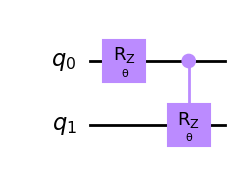

In [69]:
circ = QuantumCircuit(2)
circ.rz(theta, 0)
circ.crz(theta, 0, 1)
circ.draw('mpl')

In [70]:
theta_list = ParameterVector('θ', length=2)

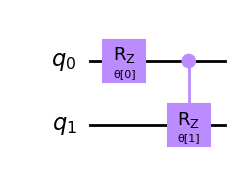

In [71]:
circ_2 = QuantumCircuit(2)
circ_2.rz(theta_list[0], 0)
circ_2.crz(theta_list[1], 0, 1)
circ_2.draw('mpl')

### Expressibility & Entangling Capability

Design two different circuits from [here](https://learn.qiskit.org/course/machine-learning/parameterized-quantum-circuits#parameterized-8-0), and draw them and prepare them for expressibility and entangling capability

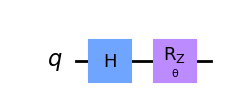

In [72]:
qc_A = QuantumCircuit(1)
qc_A.h(0)
qc_A.rz(theta, 0)
qc_A.draw('mpl')

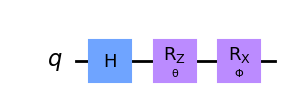

In [73]:
qc_B = QuantumCircuit(1)
qc_B.h(0)
qc_B.rz(theta, 0)
qc_B.rx(phi, 0)
qc_B.draw('mpl')

Import `numpy` and `matplotlib.pyplot`

In [74]:
import numpy as np
import matplotlib.pyplot as plt

We uniformly sample the parameter space for the two parameters `theta` and `phi`

In [75]:
np.random.seed(0)
num_param = 1000
theta_param_list = [2 * np.pi * np.random.uniform() for i in range(num_param)]
phi_param_list = [2 * np.pi * np.random.uniform() for i in range(num_param)]

Import `Bloch` and `Statevector`

In [76]:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

Create a function that converts to Bloch plot points

In [77]:
def state_to_bloch(state_vec):
    theta = 2 * np.arccos(np.abs(state_vec.data[0])) 
    phi = np.angle(state_vec.data[1]) - np.angle(state_vec.data[0])
    return [np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(theta), np.cos(theta)]

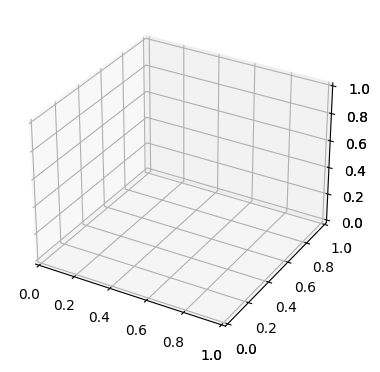

In [78]:
width, height = plt.figaspect(1/2)
fig = plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 1, projection='3d')
b1, b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'], ['tab:blue']
b1.point_marker, b2.point_marker = ['o'], ['o']
b1.point_size, b2.point_size = [2], [2]

In [79]:
for i in range(num_param):
    state_1 = Statevector.from_instruction(qc_A.bind_parameters({theta: theta_param_list[i]}))
    state_2 = Statevector.from_instruction(qc_B.bind_parameters({theta: theta_param_list[i], phi: phi_param_list[i]}))

    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()